In [91]:
import numpy as np
from scipy.stats import binom, dirichlet, lognorm, norm
from matplotlib import pyplot as plt

In [133]:
n_samples = 50

# number of genes
n_genes = 10_000

# total gene reads (library size)
R = norm(loc=1_000_000, scale=100_000)
R_i = np.array(R.rvs(n_samples), ndmin=2, dtype=int).T

# different assumptions for how the gene count distribution is
# approximately identical
uniform_distribution_of_genes = np.repeat(1, n_genes)

# lognormal with low probabilities of high and low counts
lognorm_gene_distribution = lognorm(scale=1, s=0.1).rvs(n_genes)

# gene size distribtuion with n being the number of fragments
# TODO: Add gene size distribution to look at discrepancy between CPM and RPKM

# this just ensures that all probabilities sum to one. This would be another
# source of variation. Here it is assumed that all samples i have the same
# probability of gene reads
P_g = dirichlet(alpha=1/lognorm_gene_distribution)
probs_reads = P_g.rvs()

# probability distribution (random variable) for the reads for each gene g
R_g = binom(p=probs_reads, n=R_i)

In [134]:
r_gi = R_g.rvs((n_samples, n_genes))
cpm = np.log2((r_gi + 0.5) / (R_i + 1.0) * 1e6)

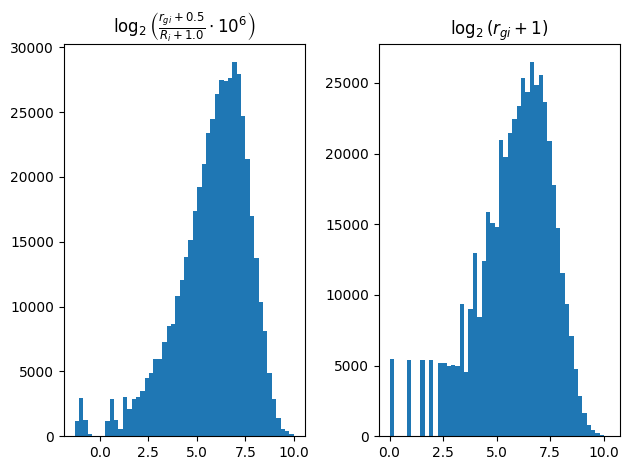

In [135]:
fig, (ax1, ax2) = plt.subplots(1,2) 
ax1.hist(cpm.flatten(), bins=50)
ax1.set_title(r"$\log_2\left(\frac{r_{gi} + 0.5}{R_i + 1.0} \cdot 10^6\right)$")
ax2.hist(np.log2(r_gi.flatten()+1), bins=50)
ax2.set_title(r"$\log_2(r_{gi}+1)$")
fig.tight_layout()

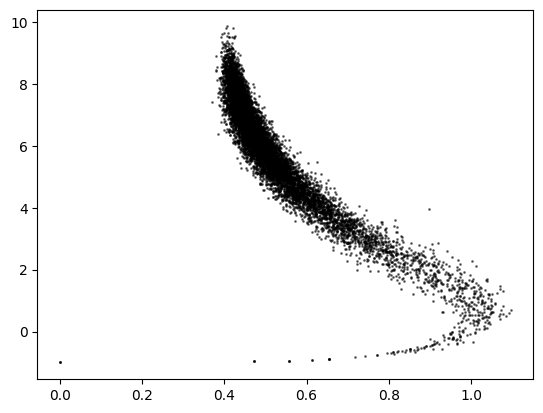

In [136]:
sigma = np.sqrt(np.std(np.log2(r_gi+0.5), axis=0))
mean = np.mean(np.log2(r_gi+0.5), axis=0)

plt.plot(sigma, mean, ls="", marker="o", ms=1, color="black", alpha=0.5)

1.0